# Object Image Classification

This project automatically identifies the class of each image. 

20 objects classes with 5-20 examples each in different angles are used as training examples to train a CNN model with the following architecture

######################################################################

**Model Architecture**

    Layer 1 : Conv2d Layer  (Kernel : (3x3))  (Stride : (1x1))  (Channels : 3->64)
    Layer 2 : BatchNorm Layer                                   (Channels :64->64)
    Layer 3 : ReLU Activation Output Layer                                        
    
    Layer 5 : MaxPool Layer (Kernel : (2x2))  (Stride : (2x2))  (Channels :64->64)
    
    Layer 5 : Conv2d Layer  (Kernel : (3x3))  (Stride : (1x1))  (Channels :64->64)
    Layer 6 : BatchNorm Layer                                   (Channels :64->64)
    Layer 7 : ReLU Activation Output Layer                                       
    
    Layer 8 : MaxPool Layer (Kernel : (2x2))  (Stride : (2x2))  (Channels :64->64)
    
    Layer 9 : Conv2d Layer  (Kernel : (3x3))  (Stride : (1x1))  (Channels :64->128)
    Layer 10 :BatchNorm Layer                                   (Channels :128->128)
    Layer 11 :ReLU Activation Output Layer                                       
    
    Layer 12 :MaxPool Layer (Kernel : (2x2))  (Stride : (2x2))  (Channels :128->128)
    
    Layer 13 :Conv2d Layer  (Kernel : (3x3))  (Stride : (1x1))  (Channels :128->128)
    Layer 14 :BatchNorm Layer                                   (Channels :128->128)
    Layer 15 :ReLU Activation Output Layer                                        
    
    Layer 16 :MaxPool Layer (Kernel : (2x2))  (Stride : (2x2))  (Channels :128->128)
    
    Layer 17 :Conv2d Layer  (Kernel : (3x3))  (Stride : (1x1))  (Channels :128->20)
    Layer 18 :BatchNorm Layer                                   (Channels : 20->20)
    Layer 19 :ReLU Activation Output Layer    
    
######################################################################

######################################################################

**Model Optimization** 

    Loss : Cross Entropy
    Optimizer : SGD (lr : 0.001, momentum : 0.9)
    
######################################################################

######################################################################

**Results**

    Avg loss (train): 0.0029
    Avg acc (train): 0.9983
    Avg loss (test): 0.0069
    Avg acc (test): 0.9567



    Training completed in 11m 43s
    Best acc: 0.9567
    
######################################################################



## Importing required Libraries

In [0]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision
from torchvision import datasets, transforms

import matplotlib.pyplot as plt

import numpy as np

import time
import copy

import torch.optim as optim
from torch.optim import lr_scheduler
from torch.autograd import Variable

## Defining the Model Architecture

In [0]:
class Net(nn.Module):

    def __init__(self, num_classes=20):
        super(Net, self).__init__()
        print("inside __init__")
        #Conv Layer 1
        self.conv1 = nn.Conv2d(3, 64, 3)
        self.conv1_bnorm = nn.BatchNorm2d(64)
        
        #Conv Layer 2
        self.conv2 = nn.Conv2d(64, 64, 3)
        self.conv2_bnorm = nn.BatchNorm2d(64)

        #Conv Layer 3
        self.conv3 = nn.Conv2d(64, 128, 3)
        self.conv3_bnorm = nn.BatchNorm2d(128)

        #Conv Layer 4
        self.conv4 = nn.Conv2d(128, 128, 3)
        self.conv4_bnorm = nn.BatchNorm2d(128)

        
        #FC Layer 1
        self.fc1   = nn.Linear(128*6*6, 20)
        self.fc1_bnorm = nn.BatchNorm1d(20)

        
    def forward(self, x):
        #Conv Layer outputs
        
        #print("inside forward")
        out = F.relu(self.conv1_bnorm(self.conv1(x)))
        out = F.max_pool2d(out, 2)
        out = F.relu(self.conv2_bnorm(self.conv2(out)))
        out = F.max_pool2d(out, 2)
        out = F.relu(self.conv3_bnorm(self.conv3(out)))
        out = F.max_pool2d(out, 2)
        out = F.relu(self.conv4_bnorm(self.conv4(out)))
        out = F.max_pool2d(out, 2)
        #print("out:",out.shape)
        out = out.view(out.size(0), -1)
        
        #FC Layer outputs
        
        #print(out.shape)
        out = F.relu(self.fc1_bnorm(self.fc1(out)))
        return out

def net(**kwargs):
    model = Net(**kwargs)
    return model

In [0]:
model=net(num_classes=10)
print(model)

inside __init__
Net(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv1_bnorm): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv2_bnorm): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (conv3_bnorm): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1))
  (conv4_bnorm): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=4608, out_features=20, bias=True)
  (fc1_bnorm): BatchNorm1d(20, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)


## Loading Dataset

In [0]:
train="data/Train"
test="data/Test"

#Loading Train set
dataset_train=datasets.ImageFolder(
                root=train,
                transform=transforms.Compose([
                    transforms.Resize(126),
                    transforms.ToTensor(),
                    #transforms.Lambda(lambda x: x.repeat(3,1,1)),
                    transforms.Normalize([0.2545,0.2545,0.2545], [0.3846,0.3846,0.3846])
                ]))
print("Length of Train Set ", len(dataset_train))

#Loading Test set
dataset_test=datasets.ImageFolder(
                root=test,
                transform=transforms.Compose([
                    transforms.Resize(126),
                    transforms.ToTensor(),
                    #transforms.Lambda(lambda x: x.repeat(3,1,1)),
                    transforms.Normalize([0.2545,0.2545,0.2545], [0.3846,0.3846,0.3846])
                ]))
print("Length of Test Set ", len(dataset_test))

#Computing number of batches, given Batch Size = 25
dataloaders_train = torch.utils.data.DataLoader(
            dataset_train,
            batch_size=25, shuffle=True, num_workers=4)

dataloaders_test = torch.utils.data.DataLoader(
            dataset_test,
            batch_size=25, shuffle=True, num_workers=4)


print("Number of batches in Train set :", len(dataloaders_train))
print("Number of batches in Test set :", len(dataloaders_test))


print("Loaded {} images under {}".format(len(dataset_train), "train"))
print("Loaded {} images under {}".format(len(dataset_test), "test"))
print("Classes: ")
class_names = dataset_train.classes
print(dataset_train.classes)
#print(len(dataset_train[0]))

Length of Train Set  1157
Length of Test Set  277
Number of batches in Train set : 47
Number of batches in Test set : 12
Loaded 1157 images under train
Loaded 277 images under test
Classes: 
['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '3', '4', '5', '6', '7', '8', '9']


## Displaying a random sample of data

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


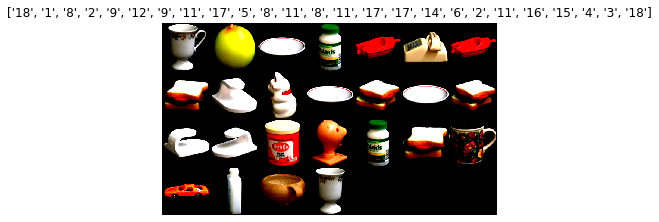

In [0]:
#Function to show sample of Train data
def imshow(inp, title=None):
    inp = inp.numpy().transpose((1, 2, 0))
    # plt.figure(figsize=(10, 10))
    plt.axis('off')
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)

def show_databatch(inputs, classes):
    out = torchvision.utils.make_grid(inputs,7)
    imshow(out, title=[class_names[x] for x in classes])

# Get a batch of training data
inputs, classes = next(iter(dataloaders_train))
show_databatch(inputs, classes)

#for i, data in enumerate(dataloaders))
#print(train[0])

## Defining model function along with parameters

In [0]:
def train_model(model, criterion, optimizer, scheduler, num_epochs):
    since = time.time()
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0
    
    avg_loss = 0.0
    avg_acc = 0.0
    avg_loss_test = 0.0
    avg_acc_test = 0.0

    train_batches = len(dataloaders_train)
    test_batches = len(dataloaders_test)
    
    for epoch in range(num_epochs):
        print("Epoch {}/{}".format(epoch, num_epochs))
        print('-' * 10)
        
        loss_train = 0
        loss_test = 0
        acc_train = 0
        acc_test = 0
        
        model.train(True)
        
        for i, data in enumerate(dataloaders_train):
           
            inputs, labels = data
            
            if use_gpu:
                inputs, labels = Variable(inputs.cuda()), Variable(labels.cuda())
            else:
                inputs, labels = Variable(inputs), Variable(labels)
            
            optimizer.zero_grad()
            #print("model calling")
            outputs = model(inputs)
            
            _, preds = torch.max(outputs.data, 1)
            loss = criterion(outputs, labels)
            
            loss.backward()
            optimizer.step()
            
            loss_train += loss.data
            acc_train += torch.sum(preds == labels.data)
            #print("acc_train=",acc_train)
            del inputs, labels, outputs, preds
            torch.cuda.empty_cache()
        
        print()
        # * 2 as we only used half of the dataset
        avg_loss = loss_train  / len(dataset_train)
        #print("before avg acc=",acc_train)
        print(10*"*")
        avg_acc = float(acc_train.data) / float(len(dataset_train))
        
        model.train(False)
        model.eval()
            
        for i, data in enumerate(dataloaders_test):
            #if i % 100 == 0:
            #print("Test batch \n")#{}/{}".format(i, test_batches), end='', flush=True)
                
            inputs, labels = data
            
            if use_gpu:
                inputs, labels = Variable(inputs.cuda(), volatile=True), Variable(labels.cuda(), volatile=True)
            else:
                inputs, labels = Variable(inputs, volatile=True), Variable(labels, volatile=True)
            
            optimizer.zero_grad()
            
            outputs = model(inputs)
            
            _, preds = torch.max(outputs.data, 1)
            loss = criterion(outputs, labels)
            
            loss_test += loss.data
            acc_test += torch.sum(preds == labels.data)
            
            del inputs, labels, outputs, preds
            torch.cuda.empty_cache()
        
        avg_loss_test = (loss_test) / len(dataset_test)
        avg_acc_test = float(acc_test) / float(len(dataset_test))
        
        print()
        print("Epoch {} result: ".format(epoch))
        print("Avg loss (train): {:.4f}".format(avg_loss))
        print("Avg acc (train): {:.4f}".format(avg_acc))
        print("Avg loss (test): {:.4f}".format(avg_loss_test))
        print("Avg acc (test): {:.4f}".format(avg_acc_test))
        print('-' * 10)
        print()
        
        if avg_acc_test > best_acc:
            best_acc = avg_acc_test
            best_model_wts = copy.deepcopy(model.state_dict())
        
    elapsed_time = time.time() - since
    print()
    print("Training completed in {:.0f}m {:.0f}s".format(elapsed_time // 60, elapsed_time % 60))
    print("Best acc: {:.4f}".format(best_acc))
    
    model.load_state_dict(best_model_wts)
    return model

## Deploying the Model

In [0]:
use_gpu = torch.cuda.is_available()

#cuda() will move everything to the GPU side
if use_gpu:
    model.cuda() 


for param in model.parameters():
    #print ("param:p",param)
    param.requires_grad = True

    
criterion = nn.CrossEntropyLoss()

optimizer_ft = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

#print("Test before training")
#eval_model(model, criterion)


print("Training")
train_model(model, criterion, optimizer_ft, lr_scheduler, 10)

#print("Test after training")
#eval_model(model, criterion)

Training
Epoch 0/10
----------

**********


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:69: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.



Epoch 0 result: 
Avg loss (train): 0.0734
Avg acc (train): 0.6698
Avg loss (test): 0.0690
Avg acc (test): 0.8448
----------

Epoch 1/10
----------

**********

Epoch 1 result: 
Avg loss (train): 0.0550
Avg acc (train): 0.9032
Avg loss (test): 0.0462
Avg acc (test): 0.9783
----------

Epoch 2/10
----------

**********

Epoch 2 result: 
Avg loss (train): 0.0483
Avg acc (train): 0.9559
Avg loss (test): 0.0426
Avg acc (test): 0.9928
----------

Epoch 3/10
----------

**********

Epoch 3 result: 
Avg loss (train): 0.0449
Avg acc (train): 0.9594
Avg loss (test): 0.0379
Avg acc (test): 0.9892
----------

Epoch 4/10
----------

**********

Epoch 4 result: 
Avg loss (train): 0.0412
Avg acc (train): 0.9784
Avg loss (test): 0.0356
Avg acc (test): 0.9928
----------

Epoch 5/10
----------

**********

Epoch 5 result: 
Avg loss (train): 0.0376
Avg acc (train): 0.9810
Avg loss (test): 0.0301
Avg acc (test): 0.9892
----------

Epoch 6/10
----------

**********

Epoch 6 result: 
Avg loss (train): 0.03

Net(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv1_bnorm): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv2_bnorm): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (conv3_bnorm): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1))
  (conv4_bnorm): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=4608, out_features=20, bias=True)
  (fc1_bnorm): BatchNorm1d(20, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)

In [0]:
torch.save(model.state_dict(), 'Model_params.pt' )